In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, roc_curve, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn import preprocessing

df=pd.read_csv('question2.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,Normal,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,Normal,Strong,Yes
4,Rain,Cool,Normal,Weak,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
Outlook        14 non-null object
Temperature    14 non-null object
Humidity       14 non-null object
Wind           14 non-null object
Play           14 non-null object
dtypes: object(5)
memory usage: 688.0+ bytes


In [3]:
#use label encoder to translate the features and targets into numbers
le=preprocessing.LabelEncoder()
outlook_encoded=le.fit_transform(df.Outlook)
tmp_encoded=le.fit_transform(df.Temperature)
hum_encoded=le.fit_transform(df.Humidity)
wind_encoded=le.fit_transform(df.Wind)
play_encoded=le.fit_transform(df.Play)

In [4]:
df["outlook_cat"]=outlook_encoded
df["tmp_cat"]=tmp_encoded
df["hum_cat"]=hum_encoded
df["wind_cat"]=wind_encoded
df["play_cat"]=play_encoded

In [5]:
df

,Outlook,Temperature,Humidity,Wind,Play,outlook_cat,tmp_cat,hum_cat,wind_cat,play_cat
0,Sunny,Hot,Normal,Weak,No,2,1,1,1,0
1,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,Rain,Mild,Normal,Strong,Yes,1,2,1,0,1
4,Rain,Cool,Normal,Weak,Yes,1,0,1,1,1
5,Rain,Mild,Normal,Strong,No,1,2,1,0,0
6,Overcast,Cool,Normal,Strong,Yes,0,0,1,0,1
7,Rain,Mild,High,Weak,No,1,2,0,1,0
8,Sunny,Cool,Normal,Strong,Yes,2,0,1,0,1
9,Rain,Hot,Normal,Strong,Yes,1,1,1,0,1


In [6]:
feature=df.values[:,5:9]
target=df.values[:,9]
target=target.astype(int)

In [7]:
model=GaussianNB()
model.fit(feature,target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
predict_test=np.array([[2,2,1,1],[1,0,0,0]])

In [9]:
model.predict(predict_test)

array([0, 0])

In [10]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest=train_test_split(feature,target,test_size=0.3,random_state=0)

In [11]:
xTrain

array([[2, 0, 0, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 0],
       [1, 2, 0, 1],
       [2, 2, 1, 0],
       [1, 2, 1, 0],
       [2, 1, 1, 1],
       [1, 2, 1, 0],
       [0, 1, 1, 1]], dtype=object)

In [12]:
yTrain

array([0, 1, 0, 0, 1, 1, 0, 0, 1])

In [13]:
model.fit(xTrain,yTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
yPredict=model.predict(xTest)

In [15]:
from sklearn import metrics
metrics.accuracy_score(yTest,yPredict)
print(metrics.classification_report(yTest,yPredict))
print(metrics.confusion_matrix(yTest,yPredict))
print(metrics.accuracy_score(yTest,yPredict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5

[[0 1]
 [1 3]]
0.6


In [16]:
fpr=dict()
tpr=dict()
roc_auc=dict()
score=model.predict_proba(xTrain)[:,1]

In [17]:
fpr,tpr,thresholds=metrics.roc_curve(yTrain, score)
print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.2 0.2 0.4 1. ]
[0.   0.25 0.5  1.   1.   1.  ]
[1.99999855 0.99999855 0.99999468 0.99997808 0.99978453 0.        ]


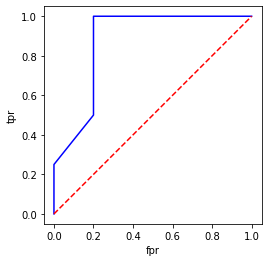

In [18]:
fig,ax=plt.subplots(figsize=(10,4))
ax.plot(fpr,tpr,color='b')
ax.plot([0,1],[0,1],'r--')
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')
ax.set_aspect('equal','box')